In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import humanize
import matplotlib.pyplot as plt
import numpy as np

@FuncFormatter
def duration_fmt(x, pos):
    return humanize.precisedelta(x, minimum_unit='minutes',format='%0.0f')

In [2]:
method_palette = {"lofreq_local_haplo": "#9593D9",
                  "LoFreq": "#9593D9",
                   "shorah_default": "#ffe66d",
                   "ShoRAH": "#ffe66d",
                   "cliquesnv_local_haplo_snv": "#4ecdc4",
                   "cliquesnv_local_haplo_snv_tf0.01": "#4ecdc4",
                   "cliquesnv_local_haplo_tf0.01": "#4ecdc4",
                   "cliquesnv_local_haplo":"#4ecdc4",
                   "CliqueSNV":  "#4ecdc4",
                   "viloca_alpha_0.000001":  "#ff6b6b",
                   "viloca_alpha_0.00001":  "#ff6b6b",
                   "viloca_alpha_3":  "#ff6b6b",
                   "viloca_alpha_0.00001_K100": "#ff6b6b",
                   "VILOCA": "#ff6b6b",
                   "viloca_multi" : "#e76f51",
                   "ground_truth": "grey",
                   "ground truth": "grey",
                   "cliquesnv_local_haplo_tf": "#ffe66d",
                   "CliqueSNV - extra params": "#ffe66d",
                   "cliquesnv_local_haplo_tf0.1": "#ffe66d", 
                  }

mapping_methods = {
    'cliquesnv_local_haplo_snv_tf0.01': "CliqueSNV",
    'cliquesnv_local_haplo_snv': "CliqueSNV",
    'cliquesnv_local_haplo_tf0.01': "CliqueSNV",
    'cliquesnv_local_haplo': "CliqueSNV",
    'shorah_default': 'ShoRAH',
    'lofreq_local_haplo': 'LoFreq',
    'viloca_alpha_0.00001': 'VILOCA',
    'viloca_alpha_0.00001_K100': 'VILOCA',
    'viloca_alpha_0.00001_K100_multib2w': 'VILOCA',
    'viloca_multi': 'VILOCA',
    'ground_truth': "ground truth",
    'cliquesnv_local_haplo_tf0.1': "CliqueSNV",
}

In [3]:
# import snv calls
fname_snv = "results/realdata/performance_measures/local/performance.csv"

# import runtime
fname_runtime = "results/realdata/performance_measures/local/runtime.csv"

In [4]:
df = pd.read_csv(fname_snv)

df['seq_tech'] = df['params'].str.split("~").str[1].str.split("\n\n").str[0]
df['seq_mode'] = df['params'].str.split("~").str[2].str.split("\n").str[0]
df['sample'] = df['params'].str.split("~").str[3].str.split("\n").str[0]

def f_sample_name(row):
    if row['seq_tech']=='pacbio':
        return "Ten-strain-IAV-Mix "
    if row['seq_tech']=='nanopore':
        return "Five-strain-PVY-Mix"
    if (row['seq_tech']=='illumina') & (row['sample']=="5-virus-mix"):
        return "Five-strain-HIV-Mix"

df['sample'] = df.apply(f_sample_name, axis=1)

In [5]:
df['method'].unique()

array(['lofreq_local_haplo', 'shorah_default',
       'viloca_alpha_0.00001_K100_multib2w', 'viloca_alpha_0.00001_K100',
       'cliquesnv_local_haplo_tf0.1'], dtype=object)

In [6]:
#methods_to_plot = [
#    'lofreq_local_haplo', 
#       'shorah_default', 
#       #'cliquesnv_local_haplo_snv_tf0.01',  # exclude because it actually cannot do snv wrt to reference
#        'viloca_alpha_0.00001_K100_multib2w', 
#       'viloca_alpha_0.00001_K100']

#df = df[df['method'].isin(methods_to_plot)]
df['Method'] = df['method'].apply(lambda x: mapping_methods[x])

In [7]:
df[df['Method']=='LoFreq']

,Unnamed: 0,method,params,replicate,variable,value,seq_tech,seq_mode,sample,Method
0,0,lofreq_local_haplo,seq\ntech~illumina\n\nseq\nmode~real\ndata\n\n...,0,precision,0.513337,illumina,real,Five-strain-HIV-Mix,LoFreq
3,3,lofreq_local_haplo,seq\ntech~nanopore\n\nseq\nmode~real\n\nseq\nm...,0,precision,0.989474,nanopore,real,Five-strain-PVY-Mix,LoFreq
6,6,lofreq_local_haplo,seq\ntech~pacbio\n\nseq\nmode~amplicon\n\nseq\...,0,precision,0.964286,pacbio,amplicon,Ten-strain-IAV-Mix,LoFreq
10,10,lofreq_local_haplo,seq\ntech~illumina\n\nseq\nmode~real\ndata\n\n...,0,recall,0.889623,illumina,real,Five-strain-HIV-Mix,LoFreq
13,13,lofreq_local_haplo,seq\ntech~nanopore\n\nseq\nmode~real\n\nseq\nm...,0,recall,0.609071,nanopore,real,Five-strain-PVY-Mix,LoFreq
16,16,lofreq_local_haplo,seq\ntech~pacbio\n\nseq\nmode~amplicon\n\nseq\...,0,recall,0.435484,pacbio,amplicon,Ten-strain-IAV-Mix,LoFreq
20,20,lofreq_local_haplo,seq\ntech~illumina\n\nseq\nmode~real\ndata\n\n...,0,f1,0.651018,illumina,real,Five-strain-HIV-Mix,LoFreq
23,23,lofreq_local_haplo,seq\ntech~nanopore\n\nseq\nmode~real\n\nseq\nm...,0,f1,0.754011,nanopore,real,Five-strain-PVY-Mix,LoFreq
26,26,lofreq_local_haplo,seq\ntech~pacbio\n\nseq\nmode~amplicon\n\nseq\...,0,f1,0.600000,pacbio,amplicon,Ten-strain-IAV-Mix,LoFreq


In [25]:
df['sample'].unique()

array(['Five-strain-HIV-Mix', 'Five-strain-PVY-Mix',
       'Ten-strain-IAV-Mix '], dtype=object)

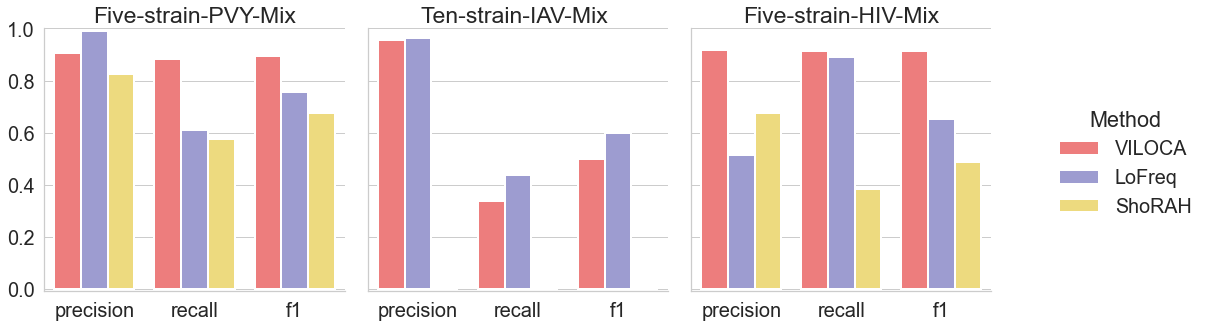

In [28]:
sns.set_theme(style = 'whitegrid')
sns.set_theme(style="whitegrid", font_scale=1.8)


g = sns.catplot(
        data=df,
        x="variable",
        y="value",
        hue="Method",
        kind="bar",
        col="sample", 
        hue_order =["VILOCA","LoFreq", "ShoRAH"],
        col_order = ['Five-strain-PVY-Mix', 'Ten-strain-IAV-Mix ', 'Five-strain-HIV-Mix' ], 
        legend=True, 
        linewidth=2,
        sharex=True,
        margin_titles=True,
        palette=method_palette,
    )

g.set_titles(col_template='{col_name}', size=23)
g.set_xticklabels(size=20)
#g.set_yticklabels(size=20)
g.set(ylabel ="")
g.set(xlabel ="")
g.set(ylim=(-0.01, 1))
g.tight_layout()

In [29]:
g.savefig("realdata_mutation_calls.svg")